<a href="https://colab.research.google.com/github/vicenterojas10/Economic-Modelling-and-Simulation/blob/main/Vicente_Exam_Economic_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Question 1

import numpy as np


a = np.arange(0, 12)
print(a)
#first we get a 1D array with numbers ranging from 0 to 11
a = a.reshape(4, 3)
#now we have a 4D array with 3 numbers each, starting from [0,1,2] ending with [9,10,11]
print(a)


a = 5 * a + 1  # Transform each element to match the pattern
#now we convert the array into the desired one by multiplying all elements by 5 and adding 1
print(a)




[ 0  1  2  3  4  5  6  7  8  9 10 11]
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
[[ 1  6 11]
 [16 21 26]
 [31 36 41]
 [46 51 56]]


In [ ]:
#@title Question 2

#The difference between a method and a magic method is that a magic method isn't created to be directly used by you but internally by the class when we perform a certain action
#a method is directly invoked in the code
#for example when we print a class, we are getting what is returned by the  __str__ magic method

#here's an example
class Person:

    def __init__(self, name, age, work):
        self._name = name
        self._age = age
        self._work = work

    def __str__(self):
        return f"I am {self._name}, I am {self._age} years old and I work at {self._work}"


    def salute(self):
      print("Hello")


vicente = Person("Vicente", 20, "University")

print(vicente)
vicente.salute()

I am Vicente, I am 20 years old and I work at University
Hello


The maximum value of Y is 9.0


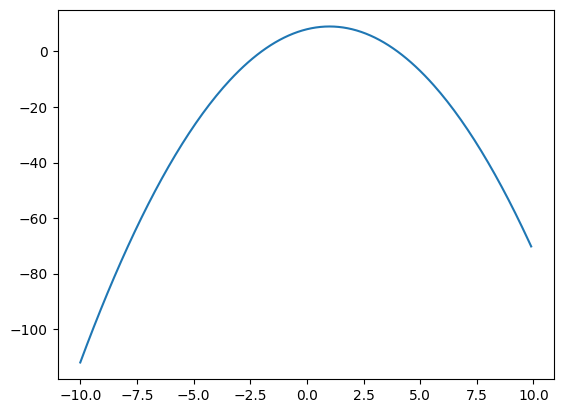

In [ ]:
#@title Question 3
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-10, 10, 0.1)
y = -x**2 + 2*x + 8

plt.plot(x, y)

#we can use the np.max() function to find the maximum value of an array

max_y = np.max(y)

print(f"The maximum value of Y is {max_y}")

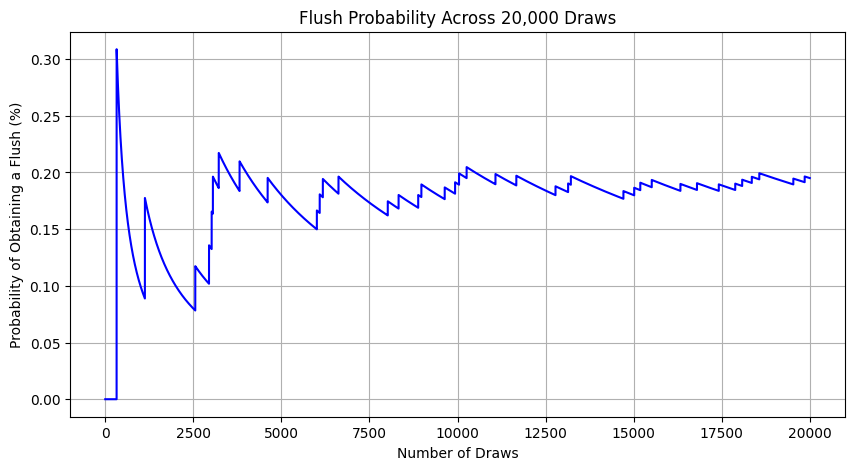

Final computed probability of drawing a Flush: 0.19%


In [ ]:
#@title Question 4


import random
import matplotlib.pyplot as plt

class Card:
    SUITS = ["♣", "♦", "♥", "♠"]
    RANKS = ["2", "3", "4", "5", "6", "7", "8", "9", "10", "J", "Q", "K", "A"]

    def __init__(self, rank, suit):
        if rank not in self.RANKS:
            raise Exception(f"Invalid rank, must be one of {self.RANKS}")
        if suit not in self.SUITS:
            raise Exception(f"Invalid suit, must be one of {self.SUITS}")
        self._rank = rank
        self._suit = suit

    @property
    def suit(self):
        return self._suit

    @property
    def rank(self):
        return self._rank

    def __str__(self):
        return f"{self.rank}{self.suit}"

    def __repr__(self):
        return self.__str__()

class Deck:
    def __init__(self):
        self._cards = tuple(Card(rank, suit) for rank in Card.RANKS for suit in Card.SUITS)

    @property
    def cards(self):
        return self._cards

    def shuffle(self):
        self._cards = tuple(sorted(self._cards, key=lambda x: random.random()))

class Hand:
    def __init__(self, deck):
        self._cards = tuple(deck.cards[i] for i in range(5))

    @property
    def cards(self):
        return self._cards

    @property
    def is_flush(self):
        suit = self._cards[0].suit
        return all(card.suit == suit for card in self._cards)

# Using matplotlib to graph
num_iterations = 20000
flush_count = 0
flush_probabilities = []

for i in range(1, num_iterations + 1):
    deck = Deck()
    deck.shuffle()
    hand = Hand(deck)
    if hand.is_flush:
        flush_count += 1
    flush_probabilities.append((flush_count / i) * 100)

# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_iterations + 1), flush_probabilities, label='Flush Probability', color='blue')
plt.xlabel('Number of Draws')
plt.ylabel('Probability of Obtaining a Flush (%)')
plt.title('Flush Probability Across 20,000 Draws')
plt.grid(True)
plt.show()

print(f"Final computed probability of drawing a Flush: {flush_probabilities[-1]:.2f}%")



[*********************100%%**********************]  1 of 1 completed


Number of rows in the DataFrame: 64
Column names in the DataFrame: ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
Highest stock value on April 11th, 2024: 13.140000343322754


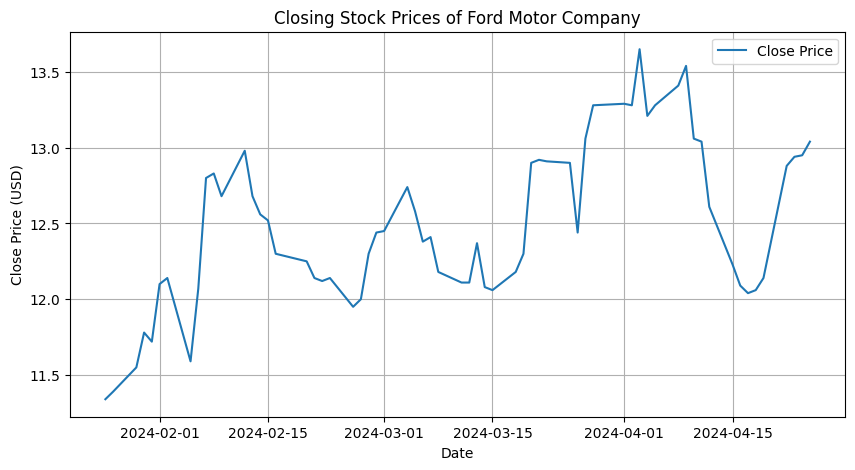

In [ ]:
#@title Question 5
import pandas as pd
import pandas_datareader.data as web
import datetime
import yfinance as yfin


#Part 1

yfin.pdr_override()

# Set the date range for the data
today = datetime.datetime.today()
formatted_date = today.strftime("%Y-%m-%d")


df1 = web.DataReader('F', start='2024-01-25', end=formatted_date)
df1.index = pd.to_datetime(df1.index)

#number of rows in the DataFrame
num_rows = df1.shape[0]
print(f"Number of rows in the DataFrame: {num_rows}")

# column names
column_names = df1.columns.tolist()
print(f"Column names in the DataFrame: {column_names}")

#highest stock value on April 11th, 2024
highest_value_april11 = df1.loc['2024-04-11']['High'].max()
print(f"Highest stock value on April 11th, 2024: {highest_value_april11}")


#Part 2
from matplotlib import pyplot as plt

# Plotting the 'Close' column
plt.figure(figsize=(10, 5))
plt.plot(df1['Close'], label='Close Price')
plt.title('Closing Stock Prices of Ford Motor Company')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#@title Question 6
import numpy as np
import pandas as pd


df = pd.DataFrame(np.random.randn(4, 4), index=[1, 2, 3, 4], columns=['a', 'b', 'c', 'd'])
print(df)

# We will choose index 3 at column c

# first we access by index label, using .loc
element_loc = df.loc[3, 'c']
print("Using .loc:", element_loc)

#now by integer location, using .iloc (zero-based)
element_iloc = df.iloc[2, 2]
print("Using .iloc:", element_iloc)

#now we access it directly with the column name and index
element_index = df['c'][3]
print("Using direct index:", element_index)


          a         b         c         d
1 -1.339303 -1.245518  1.197009 -0.584760
2  1.340530  0.216546  0.429494 -2.087763
3  0.159476  0.813755  0.682062  0.713840
4 -0.387934  0.395794  0.579779  0.255851
Using .loc: 0.6820619109507046
Using .iloc: 0.6820619109507046
Using direct index: 0.6820619109507046


In [ ]:
#@title Question 7
#In order to leverage and expand on Point's features, the ColoredPoint class inherits from it,
#demonstrating how inheritance is used in object-oriented programming. Because of this link,
#ColoredPoint can take advantage of Point's coordinate processing while adding a color attribute and related validation,
#demonstrating specialization and code reuse.
#Through the addition of features like color management and the ability to modify distance computations,
#inheritance enables ColoredPoint to grow and adapt Point's functions without causing repetition.
#By showing a "is-a" connection in which ColoredPoint is a particular kind of Point, this design improves maintainability and flexibility when using these objects in applications.

In [ ]:
#@title Question 8
https://colab.research.google.com/drive/1JCVWWE93miwlcoI_WhZDjvJI2WmsrrH2?usp=sharing

In [ ]:
#@title Question 9

#I will create a class called Person were you can add some attributes
#I will add a class method were you can add a gender to be more inclusive and fit some more profiles
class Person:

    genders = ["male", "female"]
    def __init__(self, name, age, work, gender):
        self._name = name
        self._age = age
        self._work = work
        if gender in self.genders:
          self._gender = gender
        else:
            raise Exception("Not a gender")

    def __str__(self):
        return f"I am {self._name}, I am a {self._age} years old {self._gender} and I work at {self._work}"
    @property
    def name(self):
        print(f"my name is {self._name}")

    @property
    def age(self):
        print(f"my age is {self._age}")

    @property
    def work(self):
        print(f"I work at {self._work}")

    @property
    def gender(self):
        print(f"I am a {self._gender}")

    @classmethod
    def gender_addition(cls, gender):
        cls.genders.append(gender)


vicente = Person("Vicente", 20, "University", "male")
print(vicente)

#Testing my class method

Person.gender_addition("Non-Binary")
nico = Person("Nico", 19, "University", "Non-Binary")
print(nico)

I am Vicente, I am a 20 years old male and I work at University
I am Nico, I am a 19 years old Non-Binary and I work at University
